Usage of numpy fft to extract features for segmentation. Based on:

HARMONIC ANALYSIS OF TIME-SERIES AVHRR NDVI DATA FOR CHARACTERIZING US GREAT PLAINS LAND USE/LAND COVER

1. Data

Se utiliza la ruta:

`/LUSTRE/MADMEX/tasks/2019_tasks/generacion_datos_entrenamiento_cultivos/examples_source_data`


No se usa la funcionalidad del datacube (gridworkflow load) pues se requiere que estén en la ruta:

`/shared_volume/datacube/datacube_ingest/*/mexico/`

pero el `shared_volume` es de `LUSTRE` y no de la máquina de Ixchel... se prefiere no tener los datos en la ruta de la línea anterior y mejor usar la de `tasks`... al final el load no importa para la creación de las series de tiempo...



In [1]:
from datetime import datetime
import datetime as dt
import xarray as xr
import numpy as np
import glob
%matplotlib inline

from dask.distributed import Client

from madmex.wrappers import gwf_query
from madmex.util.xarray import to_float, to_int
from datacube.api import GridWorkflow
from madmex.util.xarray import to_float

In [2]:
scheduler_file = '/shared_volume/scheduler.json'

In [3]:
client = Client(scheduler_file=scheduler_file)

In [4]:
client

Client Scheduler: tcp://10.0.0.3:8786 Dashboard: http://10.0.0.3:8787/status,Cluster Workers: 5 Cores: 5 Memory: 400.00 GB


In [5]:
client.restart()

Client Scheduler: tcp://10.0.0.3:8786 Dashboard: http://10.0.0.3:8787/status,Cluster Workers: 5 Cores: 5 Memory: 400.00 GB


In [6]:
path = '/LUSTRE/MADMEX/tasks/2019_tasks/generacion_datos_entrenamiento_cultivos/examples_source_data/' 

In [7]:
#sr_0_no_chunks = xr.open_mfdataset(path +'/LS5*.nc',
#                                  data_vars='minimal', coords='minimal',
#                                  combine='by_coords')

#for sentinel2:
sr_0 = xr.open_mfdataset(path +'/s2_l2a_10m_scl_s3_39_-30*.nc',
                                  data_vars='minimal', coords='minimal',
                                  combine='by_coords', chunks={'time':-1, 'x': 100, 'y': 100},
                                  lock=False)


In [8]:
sr_0

<xarray.Dataset>
Dimensions:   (time: 63, x: 5002, y: 5002)
Coordinates:
  * x         (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
  * y         (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * time      (time) datetime64[ns] 2018-10-04T17:08:24 ... 2019-09-26T17:08:12
Data variables:
    crs       int32 -2147483647
    blue      (time, y, x) float32 dask.array<chunksize=(1, 100, 100), meta=np.ndarray>
    green     (time, y, x) float32 dask.array<chunksize=(1, 100, 100), meta=np.ndarray>
    red       (time, y, x) float32 dask.array<chunksize=(1, 100, 100), meta=np.ndarray>
    nir       (time, y, x) float32 dask.array<chunksize=(1, 100, 100), meta=np.ndarray>
    pixel_qa  (time, y, x) float32 dask.array<chunksize=(1, 100, 100), meta=np.ndarray>
    dataset   (time) |S5014 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    date_created:           2019-11-21T19:14:58.983033
    Conventions:            CF-1.6, ACDD-1.3
    history:   

In [9]:
sr_0.time

<xarray.DataArray 'time' (time: 63)>
array(['2018-10-04T17:08:24.000000000', '2018-10-06T17:05:22.000000000',
       '2018-10-09T17:12:34.000000000', '2018-10-31T17:02:21.000000000',
       '2018-11-05T17:00:45.000000000', '2018-11-08T17:18:03.000000000',
       '2018-11-15T17:08:06.000000000', '2018-11-30T17:08:08.000000000',
       '2018-12-03T17:18:02.000000000', '2018-12-08T17:17:59.000000000',
       '2018-12-15T17:08:03.000000000', '2018-12-18T17:17:59.000000000',
       '2018-12-20T17:08:07.000000000', '2018-12-23T17:18:03.000000000',
       '2019-01-07T17:18:02.000000000', '2019-01-19T17:08:12.000000000',
       '2019-01-22T17:18:07.000000000', '2019-02-03T17:08:09.000000000',
       '2019-02-06T17:18:04.000000000', '2019-02-11T17:18:07.000000000',
       '2019-02-13T17:08:09.000000000', '2019-02-16T17:17:57.000000000',
       '2019-02-16T17:18:04.000000000', '2019-02-26T17:18:03.000000000',
       '2019-02-26T17:18:11.000000000', '2019-03-08T17:18:02.000000000',
       '2019-0

In [10]:
sr_0 = client.persist(sr_0)

In [11]:
sr_0 = sr_0.chunk({'time': -1, 'x': 1667, 'y': 1667})

In [12]:
sr_0

<xarray.Dataset>
Dimensions:   (time: 63, x: 5002, y: 5002)
Coordinates:
  * x         (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
  * y         (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * time      (time) datetime64[ns] 2018-10-04T17:08:24 ... 2019-09-26T17:08:12
Data variables:
    crs       int32 -2147483647
    blue      (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    green     (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    red       (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    nir       (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    pixel_qa  (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    dataset   (time) |S5014 dask.array<chunksize=(63,), meta=np.ndarray>
Attributes:
    date_created:           2019-11-21T19:14:58.983033
    Conventions:            CF-1.6, ACDD-1.3

In [13]:
#sr_0 = client.persist(sr_0)

In [14]:
sr_0 = sr_0.drop(['dataset'])

In [15]:
sr_0['blue'].attrs['nodata']=-999.
sr_0['green'].attrs['nodata']=-999.
sr_0['red'].attrs['nodata']=-999.
sr_0['nir'].attrs['nodata']=-999.
sr_0['pixel_qa'].attrs['nodata']=-999.

In [16]:
sr_0.blue.attrs

OrderedDict([('grid_mapping', 'crs'),
             ('units', 'reflectance'),
             ('long_name', 'Surface Reflectance at 496.6 nm (Blue)'),
             ('alias', 'band_2'),
             ('nodata', -999.0)])

In [17]:
sr_1 = sr_0.where(sr_0.pixel_qa.isin([2,4,5,6,7,8,11]))

In [18]:
sr_1 = sr_1.drop(['blue','green'])

In [19]:
sr_1['ndvi'] = ((sr_1.nir-sr_1.red)/(sr_1.nir+sr_1.red))* 10000

In [20]:
sr_1

<xarray.Dataset>
Dimensions:   (time: 63, x: 5002, y: 5002)
Coordinates:
  * x         (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
  * y         (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * time      (time) datetime64[ns] 2018-10-04T17:08:24 ... 2019-09-26T17:08:12
Data variables:
    crs       (time, y, x) float64 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    red       (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    nir       (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    pixel_qa  (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    ndvi      (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
Attributes:
    date_created:           2019-11-21T19:14:58.983033
    Conventions:            CF-1.6, ACDD-1.3
    history:                NetCDF-CF file created by datacube version '1.6.2...
    geospatial_bounds: 

In [ ]:
sr_1 = client.persist(sr_1)

In [25]:
sr_1

<xarray.Dataset>
Dimensions:   (time: 63, x: 5002, y: 5002)
Coordinates:
  * y         (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x         (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
  * time      (time) datetime64[ns] 2018-10-04T17:08:24 ... 2019-09-26T17:08:12
Data variables:
    crs       (time, y, x) float64 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    red       (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    nir       (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    pixel_qa  (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    ndvi      (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
Attributes:
    date_created:           2019-11-21T19:14:58.983033
    Conventions:            CF-1.6, ACDD-1.3
    history:                NetCDF-CF file created by datacube version '1.6.2...
    geospatial_bounds: 

In [26]:
from affine import Affine
from datacube.utils.geometry import CRS

See https://rasterio.readthedocs.io/en/stable/topics/migrating-to-v1.html **for relation between affine and geotransform**

In [27]:
l_geotransform = list(sr_0.crs.attrs['GeoTransform'])

In [28]:
l_geotransform

[2927940.0, 10.0, 0.0, 976140.0, 0.0, -10.0]

In [29]:
l_affine = [l_geotransform[1], l_geotransform[2], l_geotransform[0],l_geotransform[4],l_geotransform[5],l_geotransform[3]]

In [30]:
l_affine

[10.0, 0.0, 2927940.0, 0.0, -10.0, 976140.0]

In [31]:
crs_attr = sr_0.crs.attrs['crs_wkt']

In [32]:
crs_attr

'PROJCS["unnamed",GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,6556752.3141]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["standard_parallel_1",17.5],PARAMETER["standard_parallel_2",29.5],PARAMETER["latitude_of_origin",12],PARAMETER["central_meridian",-102],PARAMETER["false_easting",2500000],PARAMETER["false_northing",0]]'

In [33]:
sr_0 = None

In [34]:
import gc

In [35]:
gc.collect()

344

In [61]:
sr_1 = sr_1.compute()

IndexError: tuple index out of range

In [36]:
sr_1

<xarray.Dataset>
Dimensions:   (time: 63, x: 5002, y: 5002)
Coordinates:
  * y         (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x         (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
  * time      (time) datetime64[ns] 2018-10-04T17:08:24 ... 2019-09-26T17:08:12
Data variables:
    crs       (time, y, x) float64 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    red       (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    nir       (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    pixel_qa  (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    ndvi      (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
Attributes:
    date_created:           2019-11-21T19:14:58.983033
    Conventions:            CF-1.6, ACDD-1.3
    history:                NetCDF-CF file created by datacube version '1.6.2...
    geospatial_bounds: 

In [37]:
sr_1 = sr_1.drop(['red', 'nir'])

In [38]:
sr_1

<xarray.Dataset>
Dimensions:   (time: 63, x: 5002, y: 5002)
Coordinates:
  * y         (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x         (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
  * time      (time) datetime64[ns] 2018-10-04T17:08:24 ... 2019-09-26T17:08:12
Data variables:
    crs       (time, y, x) float64 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    pixel_qa  (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
    ndvi      (time, y, x) float32 dask.array<chunksize=(63, 1667, 1667), meta=np.ndarray>
Attributes:
    date_created:           2019-11-21T19:14:58.983033
    Conventions:            CF-1.6, ACDD-1.3
    history:                NetCDF-CF file created by datacube version '1.6.2...
    geospatial_bounds:      POLYGON ((-97.8727504122921 20.6854256730153,-97....
    geospatial_bounds_crs:  EPSG:4326
    geospatial_lat_min:     20.220760141432255
    geospatial_lat_max:     20.68542567

In [39]:
begin=np.datetime_as_string(sr_1['time'].values[0],unit='D')

In [40]:
begin

'2018-10-04'

In [41]:
begin_time = datetime.strptime(begin, '%Y-%m-%d')

In [42]:
#if using sentinel change to 10D, if using landsat change to 80D
ts_1 = sr_1.ndvi.resample(time='10D', 
                          loffset=begin_time - 
                          datetime.utcfromtimestamp(sr_1['time'][0].values.astype(datetime)*1e-9),
                          keep_attrs=True).nearest(tolerance=dt.timedelta(hours=120)).chunk({'time': -1}).interpolate_na('time')
#ts_2 = sr_1.ndvi.resample(time='10D',
#                   loffset=begin_time - 
#                   datetime.utcfromtimestamp(sr_1['time'][0].values.astype(datetime)*1e-9)).max('time', 
#                                                                                                keep_attrs=True,
#                                                                                                skipna=True).chunk({'time': -1}).interpolate_na('time')#


In [43]:
ts_1

<xarray.DataArray 'ndvi' (time: 51, y: 5002, x: 5002)>
dask.array<transpose, shape=(51, 5002, 5002), dtype=float32, chunksize=(51, 1667, 1667), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2018-10-04 2018-10-11 ... 2019-09-19
  * y        (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x        (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06

In [44]:
ts_1['time']

<xarray.DataArray 'time' (time: 51)>
array(['2018-10-04T00:00:00.000000000', '2018-10-11T00:00:00.000000000',
       '2018-10-18T00:00:00.000000000', '2018-10-25T00:00:00.000000000',
       '2018-11-01T00:00:00.000000000', '2018-11-08T00:00:00.000000000',
       '2018-11-15T00:00:00.000000000', '2018-11-22T00:00:00.000000000',
       '2018-11-29T00:00:00.000000000', '2018-12-06T00:00:00.000000000',
       '2018-12-13T00:00:00.000000000', '2018-12-20T00:00:00.000000000',
       '2018-12-27T00:00:00.000000000', '2019-01-03T00:00:00.000000000',
       '2019-01-10T00:00:00.000000000', '2019-01-17T00:00:00.000000000',
       '2019-01-24T00:00:00.000000000', '2019-01-31T00:00:00.000000000',
       '2019-02-07T00:00:00.000000000', '2019-02-14T00:00:00.000000000',
       '2019-02-21T00:00:00.000000000', '2019-02-28T00:00:00.000000000',
       '2019-03-07T00:00:00.000000000', '2019-03-14T00:00:00.000000000',
       '2019-03-21T00:00:00.000000000', '2019-03-28T00:00:00.000000000',
       '2019-0

In [45]:
times=np.datetime_as_string(ts_1['time'],unit='D')

In [46]:
times

array(['2018-10-04', '2018-10-11', '2018-10-18', '2018-10-25',
       '2018-11-01', '2018-11-08', '2018-11-15', '2018-11-22',
       '2018-11-29', '2018-12-06', '2018-12-13', '2018-12-20',
       '2018-12-27', '2019-01-03', '2019-01-10', '2019-01-17',
       '2019-01-24', '2019-01-31', '2019-02-07', '2019-02-14',
       '2019-02-21', '2019-02-28', '2019-03-07', '2019-03-14',
       '2019-03-21', '2019-03-28', '2019-04-04', '2019-04-11',
       '2019-04-18', '2019-04-25', '2019-05-02', '2019-05-09',
       '2019-05-16', '2019-05-23', '2019-05-30', '2019-06-06',
       '2019-06-13', '2019-06-20', '2019-06-27', '2019-07-04',
       '2019-07-11', '2019-07-18', '2019-07-25', '2019-08-01',
       '2019-08-08', '2019-08-15', '2019-08-22', '2019-08-29',
       '2019-09-05', '2019-09-12', '2019-09-19'], dtype='<U28')

In [47]:
ts_1_times_clean = ts_1.assign_coords({'time':times})

In [48]:
ts_1_times_clean

<xarray.DataArray 'ndvi' (time: 51, y: 5002, x: 5002)>
dask.array<transpose, shape=(51, 5002, 5002), dtype=float32, chunksize=(51, 1667, 1667), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) <U28 '2018-10-04' '2018-10-11' ... '2019-09-12' '2019-09-19'
  * y        (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x        (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06

In [49]:
ts_1_times_clean.shape[0]

51

In [50]:
import dask.array as da

In [56]:
ts_da = da.from_array(ts_1_times_clean, chunks=(ts_1_times_clean.shape[0], 1667, 1667))

In [57]:
ts_da

dask.array<array, shape=(51, 5002, 5002), dtype=float32, chunksize=(51, 1000, 1000), chunktype=xarray.DataArray>

In [58]:
index_max = da.argmax(ts_da,axis=0)

In [59]:
index_max

dask.array<arg_agg-aggregate, shape=(5002, 5002), dtype=int64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

In [60]:
index_max_ndarray = index_max.compute()

TypeError: 'Future' object is not subscriptable

In [59]:
index_max_ndarray.shape

(5002, 5002)

In [174]:
ts_da.shape

(36, 5002, 5002)

In [168]:
max_da = da.max(ts_da,axis=0)

In [169]:
max_da

dask.array<amax-aggregate, shape=(5002, 5002), dtype=float32, chunksize=(1667, 1667), chunktype=xarray.DataArray>

In [214]:
max_ndarray = max_da.compute()

In [215]:
max_ndarray.shape

(5002, 5002)

In [216]:
index_max_ndarray[np.where(np.isnan(max_ndarray))] = -999

In [217]:
max_ndarray[np.where(np.isnan(max_ndarray))] = -999

In [218]:
np.max(max_ndarray)

9994.983

## convert to xarray dataset

In [219]:
from numpy import newaxis

In [220]:
index_max_xr = xr.DataArray(index_max_ndarray[:,:,newaxis], dims = ['x','y','time'],
                         coords= {'y': sr_1.coords['y'],
                                  'x': sr_1.coords['x']})

In [221]:
max_xr = xr.DataArray(max_ndarray[:,:,newaxis], dims = ['x','y','time'],
                         coords= {'y': sr_1.coords['y'],
                                  'x': sr_1.coords['x']})

In [222]:
index_max_xr.name = 'index_max_xr'

In [223]:
max_xr.name = 'max_xr'

In [224]:
index_max_xr.attrs['nodata']=-999
index_ts_xr = xr.Dataset({})
index_ts_xr['index_max_ts_xr'] = index_max_xr
index_ts_xr['max_ts_xr'] = max_xr
index_ts_xr.attrs['nodata'] = -999

In [225]:
def to_int_32(x):
    x_int = x.where(xr.DataArray.notnull(x))#, x.attrs['nodata'])
    return x_int.astype('int32')

In [226]:
index_ts_xr = index_ts_xr.apply(to_int_32)

In [227]:
index_ts_xr.attrs['affine'] = Affine(*l_affine)
index_ts_xr.attrs['crs'] = CRS(crs_attr)

In [228]:
index_ts_xr

<xarray.Dataset>
Dimensions:          (time: 1, x: 5002, y: 5002)
Coordinates:
  * y                (y) float64 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x                (x) float64 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
Dimensions without coordinates: time
Data variables:
    index_max_ts_xr  (x, y, time) int32 0 0 1 0 0 0 ... -999 -999 -999 -999 -999
    max_ts_xr        (x, y, time) int32 8715 8569 8488 8697 ... -999 -999 -999
Attributes:
    affine:   | 10.00, 0.00, 2927940.00|\n| 0.00,-10.00, 976140.00|\n| 0.00, ...
    crs:      PROJCS["unnamed",GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS8...

In [76]:
import matplotlib.pyplot as plt

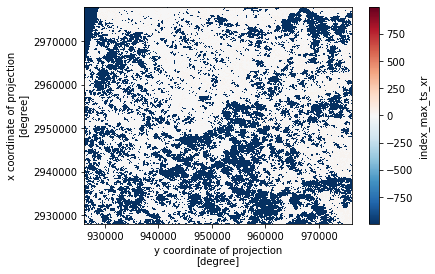

In [229]:
index_ts_xr['index_max_ts_xr'][:,:,0].plot.imshow()

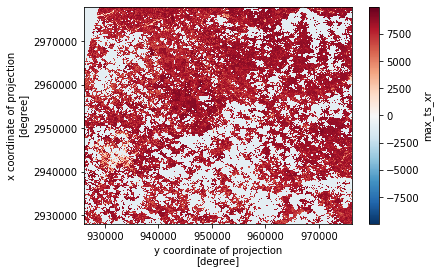

In [230]:
index_ts_xr['max_ts_xr'][:,:,0].plot.imshow()

## Segmentation

In [89]:
from django.contrib.gis.geos.geometry import GEOSGeometry
import gc
from importlib import import_module
import os

from madmex.settings import TEMP_DIR
from madmex.util import parser_extra_args


In [134]:
algorithm = 'bis' #'slic'
name = 'index_max_1_12_2019_sentinel2'
extra_args = parser_extra_args(['t=20','s=0.5','c=0.7']) #for slic: parser_extra_args(['n_segments=10000', 'compactness=0.5'])

In [135]:
try:
    module = import_module('madmex.segmentation.%s' % algorithm)
    Segmentation = module.Segmentation
except ImportError as e:
    raise ValueError('Invalid model argument')

In [136]:
path = os.path.join(TEMP_DIR) + '/segmentation_results/'

In [137]:
if not os.path.exists(path):
    os.makedirs(path)

In [138]:
seg = Segmentation.from_geoarray(index_ts_xr, **extra_args)

In [139]:
seg.geobox.extent.wkt

'POLYGON ((2927940 976140,2927940 926120,2977960 926120,2977960 976140,2927940 976140))'

In [140]:
seg.segment()

In [141]:
seg.segments_array

array([[86257, 86257, 86257, ..., 86847, 86847, 86847],
       [86257, 86257, 86257, ..., 86847, 86847, 86847],
       [86257, 86257, 86257, ..., 86847, 86847, 86847],
       ...,
       [    0,     0,     0, ...,   163,   163,   163],
       [    0,     0,     0, ...,   163,   163,   163],
       [    0,     0,     0, ...,   163,   163,   163]], dtype=int32)

In [142]:
fc = seg.polygonize()

In [143]:
name_file = name + '_' + algorithm + '_t_' + str(extra_args['t']) +'_s_'+ str(extra_args['s']) +'_c_'+ str(extra_args['c']) + '.shp'
name_file

'index_max_1_12_2019_sentinel2_bis_t_20_s_0.5_c_0.7.shp'

In [144]:
shp_path = seg.to_shapefile(filename=path + '/' +name_file, fc=fc)
